## 1

We should always bet on heads, because in the long run we are almost garanteed to have more heads than tails. Now, for the amount, I'm not so sure. My first guess would be either 40% or 20% because it is 1-p and (1-p)/2 and it makes sense somehow in my head that that is the case.

## 2 
I tried the game with 20% and finished with $552.72

## 3
lets see what pyhton finds for the optimized percentage

In [85]:
import numpy as np

def betOnBisedCoin(bet, initMoney=250, n=20, headProb=0.6):
    money = initMoney
    for _ in range(n):
        pol = money*bet

        if np.random.random() < headProb:
            money += pol
        else:
            money -= pol

    return money


In [86]:
import matplotlib.pyplot as plt

bets = [i/100 for i in range(10,91,5)]

money_per_bet=[]
for bet in bets:
    moneys = []
    for _ in range(100000):
        moneys.append(betOnBisedCoin(bet))
    money_per_bet.append(moneys)

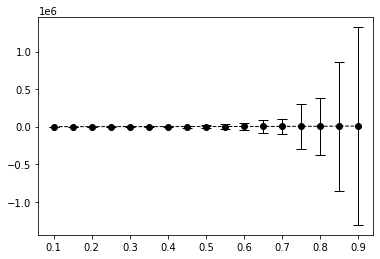

In [87]:
plt.errorbar(x=bets, 
            y=[np.mean(i) for i in money_per_bet], 
            yerr=[1.96*np.std(i) for i in money_per_bet],
            color='black', marker='o', capsize=5, linestyle='--', linewidth=1)

plt.show()

#this is not helpfull

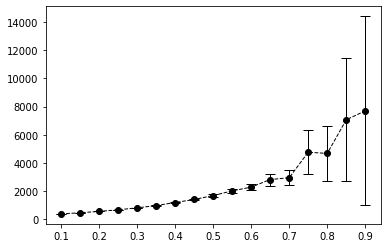

In [88]:
plt.errorbar(x=bets, 
            y=[np.mean(i) for i in money_per_bet], 
            yerr=[0.01*np.std(i) for i in money_per_bet],
            color='black', marker='o', capsize=5, linestyle='--', linewidth=1)

plt.show()

#the confidence interval for this can't be calculated with the standard deviation, because the data is very skewd

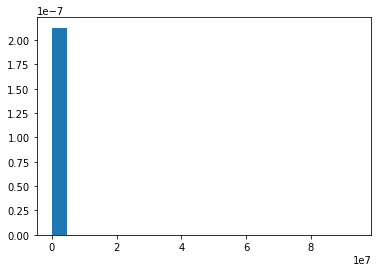

In [96]:
#0.8
plt.hist(money_per_bet[-1], density=True, bins=20)
plt.show()

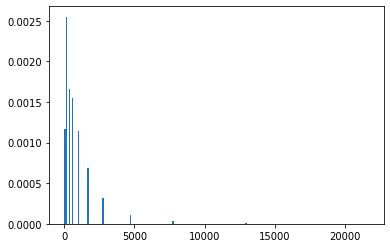

In [90]:
#0.2
plt.hist(money_per_bet[3], density=True, bins=200)
plt.show()

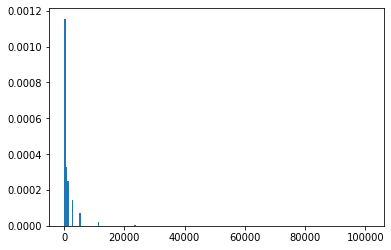

In [91]:
#0.4
plt.hist(money_per_bet[5], density=True, bins=200)
plt.show()

In [92]:
new_mpb=[]

for i in money_per_bet:
    m = []
    for j in i:
        if j>250:
            m.append(j)
    new_mpb.append(m)

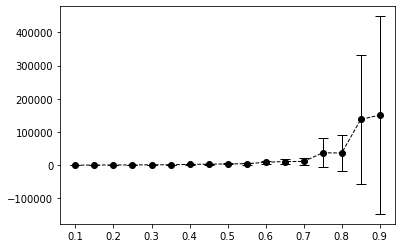

In [93]:
plt.errorbar(x=bets, 
            y=[np.mean(i) for i in new_mpb], 
            yerr=[0.1*np.std(i) for i in new_mpb],
            color='black', marker='o', capsize=5, linestyle='--', linewidth=1)

plt.show()

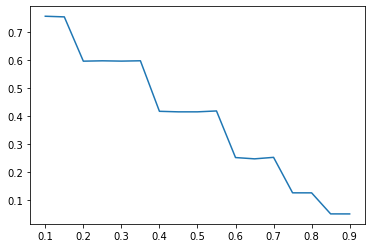

In [94]:
y = [len(i)/100000 for i in new_mpb]
plt.plot(bets, y)
plt.show()

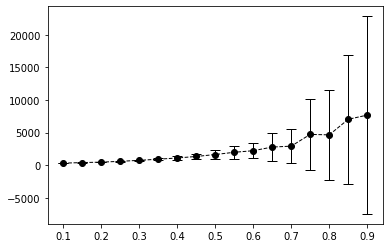

In [95]:
norm = [np.array(i)*j for i,j in zip(new_mpb,y)]

plt.errorbar(x=bets, 
            y=[np.mean(i) for i in norm], 
            yerr=[0.1*np.std(i) for i in norm],
            color='black', marker='o', capsize=5, linestyle='--', linewidth=1)

plt.show()